Hi, Kagglers!

Hereafter I will try to reveal some basics about Instacart dataset <br>**by conducting an exploratory data analysis of given Dataset**

**Brief description**

The Dataset is an anonymized sample of over 3,000,000 grocery orders from more than 200,000 Instacart users. 
<br>The goal of a competition is to predict which previously purchased products will be in a user’s next order. 

### Stay tuned, this notebook will be updated on a regular basis
**P.s. Upvotes and comments would let me update it faster and in a more smart way :)**

## Notebook Setup

In [25]:
import pandas as pd 
import numpy as np 

from IPython.display import Image

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import matplotlib
import squarify  

color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings

%matplotlib inline

from itertools import combinations, groupby
from collections import Counter

## Data Load

### Raw data load

In [2]:
# aisles
aisles = pd.read_csv('../data/aisles.csv', engine='c')
print('Total aisles: {}'.format(aisles.shape[0]))
aisles.head()

Total aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
# departments
departments = pd.read_csv('../data/departments.csv', engine='c')
print('Total departments: {}'.format(departments.shape[0]))
departments.head()

Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
# products
products = pd.read_csv('../data/products.csv', engine='c')
print('Total products: {}'.format(products.shape[0]))
products.head(5)

Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# order
order = pd.read_csv('../../../../orders.csv', engine='c')
print('Total orders: {}'.format(order.shape[0]))
print('Total users: {}'.format(len(order['user_id'].unique())))
order.head(5)

Total orders: 3421083
Total users: 206209


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
# order details
op_train = pd.read_csv('../data/order_products__train.csv', engine='c')
op_prior = pd.read_csv('../../../../order_products__prior.csv', engine='c')
print('Total orders: {}'.format(op_train.shape[0]))
op_train.head(5)

Total orders: 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Product details table

In [7]:
# combine aisles, departments and products (left joined to products)
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# to retain '-' and make product names more "standard"
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower() 
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


In [8]:
#order details for train orders
train_master = pd.merge(
                             left=op_train,
                             right=order, 
                             how='left', 
                             on='order_id'
                        )

train_master = pd.merge(
                            left=train_master,
                            right=goods[['product_id','aisle_id','department_id']],
                            how='left',
                            on='product_id'
)

train_master.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,95,15


In [9]:
#order details for prior orders
prior_master = pd.merge(
                             left=op_prior,
                             right=order, 
                             how='left', 
                             on='order_id'
                        )

prior_master = pd.merge(
                            left=prior_master,
                            right=goods[['product_id','aisle_id','department_id']],
                            how='left',
                            on='product_id'
)

prior_master.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,17,13


In [10]:
#master_table
df_master = pd.concat([prior_master,train_master], axis=0)

## Exploratory Data Visualization

### Top ordered products per department

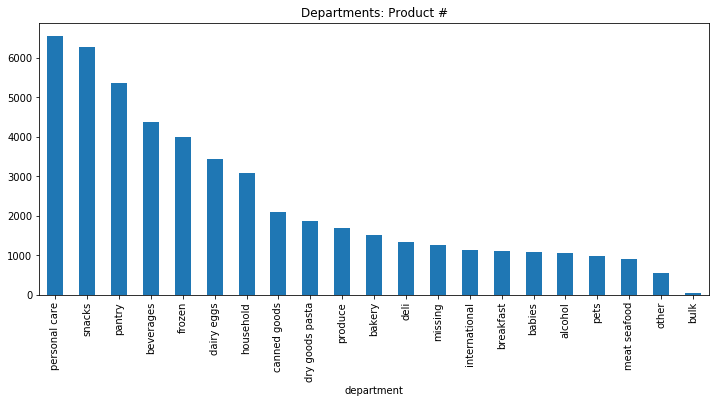

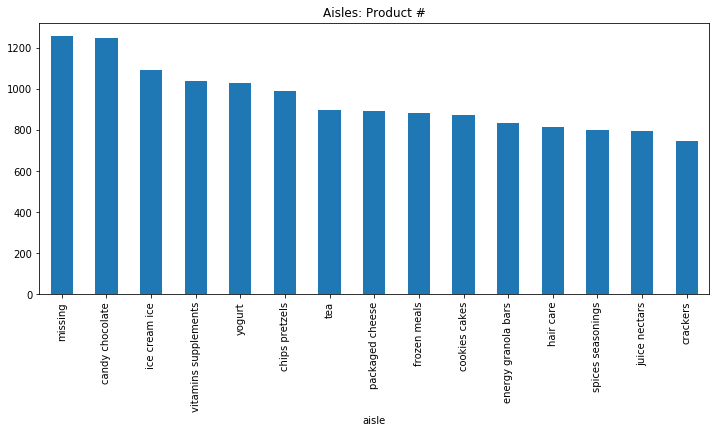

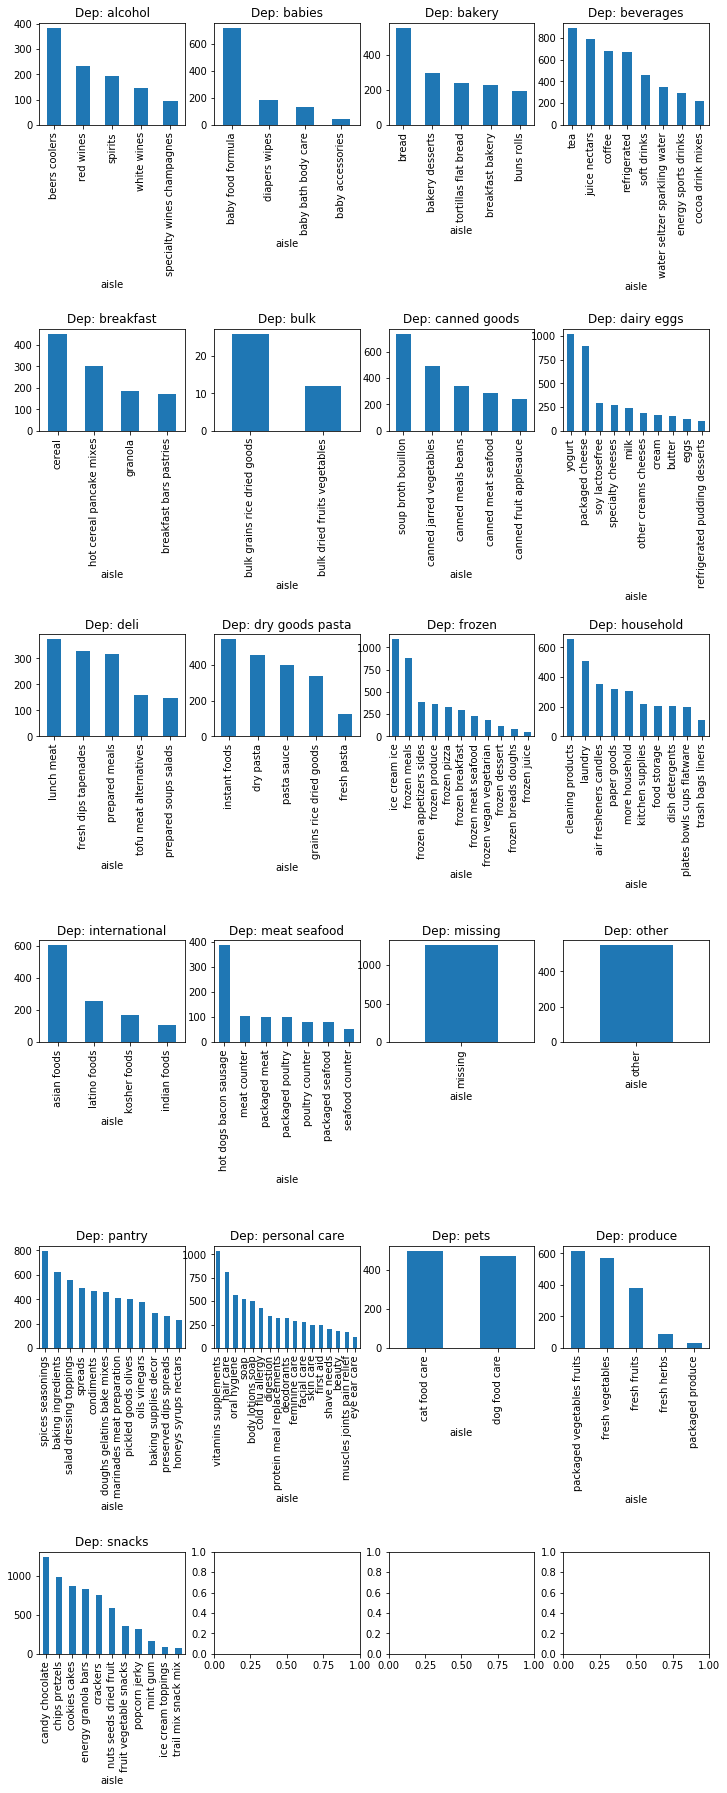

In [11]:
# basic group info (departments)
plt.figure(figsize=(12, 5))
goods.groupby(['department']).count()['product_id'].copy().sort_values(ascending=False).plot(kind='bar',  
                                                                                           title='Departments: Product #')

# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
goods.groupby(['aisle']).count()['product_id'].sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                                                                            title='Aisles: Product #')

# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    goods[goods.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

### Products by Department and Aisle

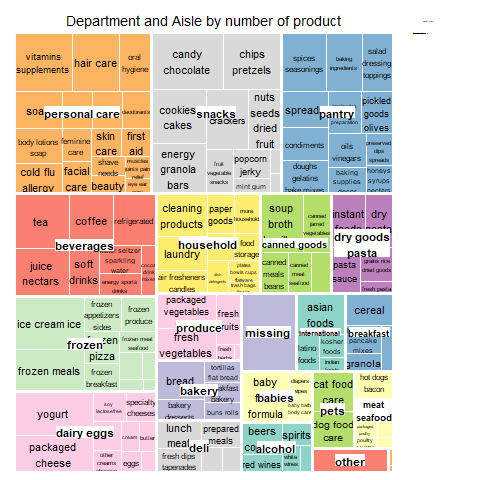

In [12]:
#Department and Aisle: Sized by # of products
Image(filename = "../misc/Department and Aisle by Number of Products.png")

### Orders by Department and Aisle

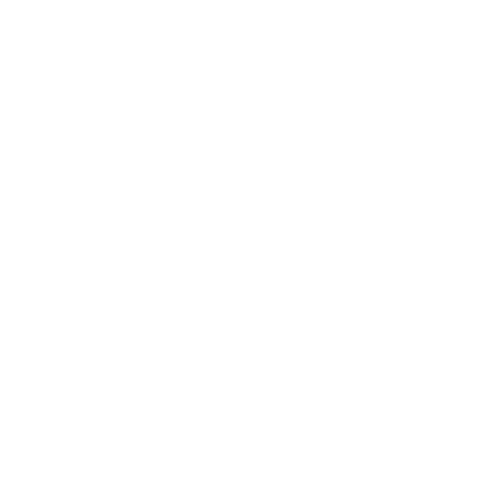

In [13]:
#Department and Aisle: Sized by # of orders
Image(filename = "../misc/Department and Aisle by Number of orders.png")

### Orders by Day of the Week

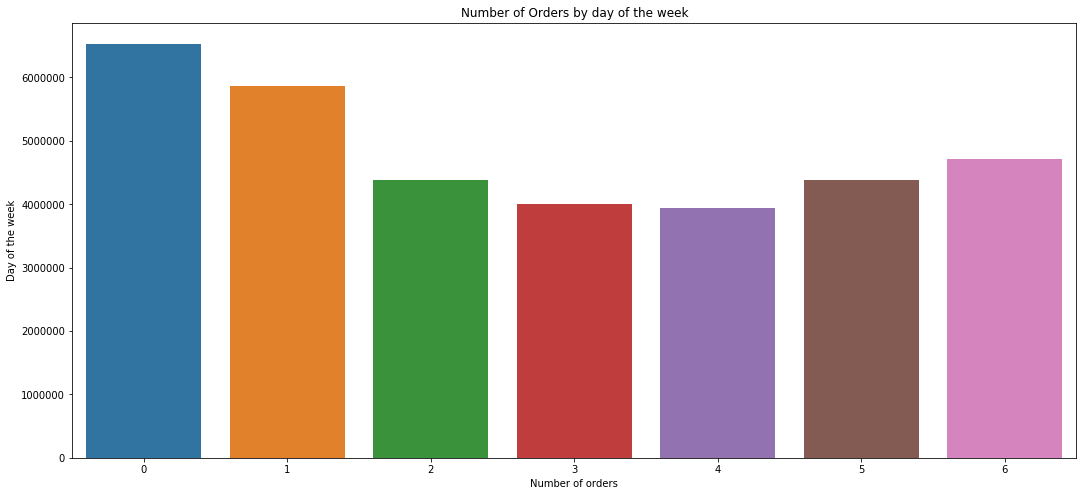

In [14]:
#count of orders by day of the week
viz = df_master.groupby('order_dow').count().reset_index()
viz.head(5)

plt.figure(figsize=(18,8))
ax = sns.barplot(x='order_dow', y='order_id',data=viz)
ax.set(xlabel='Number of orders', ylabel='Day of the week')
plt.title('Number of Orders by day of the week')
plt.show()

### Orders by Hour of the day

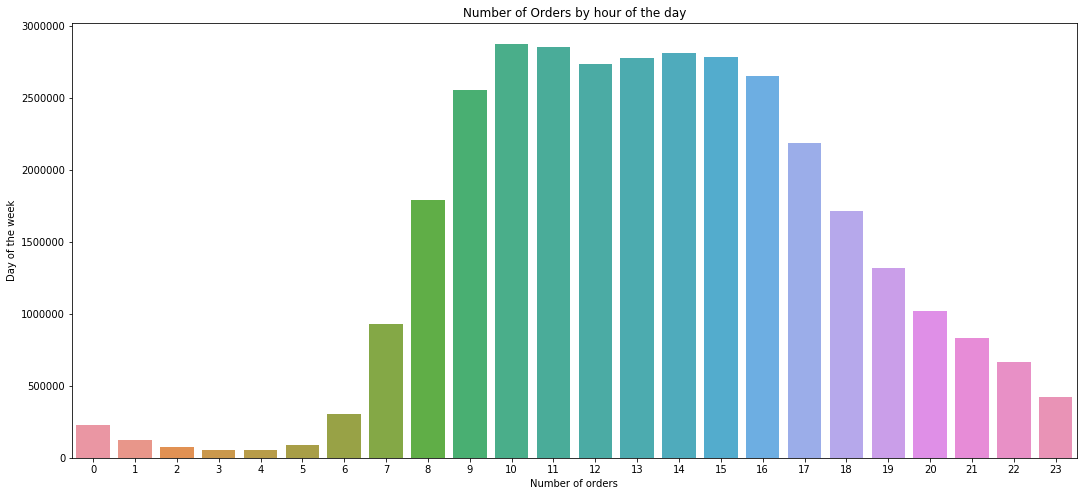

In [15]:
#count of orders by day of the week
viz = df_master.groupby('order_hour_of_day').count().reset_index()
viz.head(5)

plt.figure(figsize=(18,8))
ax = sns.barplot(x='order_hour_of_day', y='order_id',data=viz)
ax.set(xlabel='Number of orders', ylabel='Day of the week')
plt.title('Number of Orders by hour of the day')
plt.show()

### Day of the Week vs. Hour of the day: Number of orders

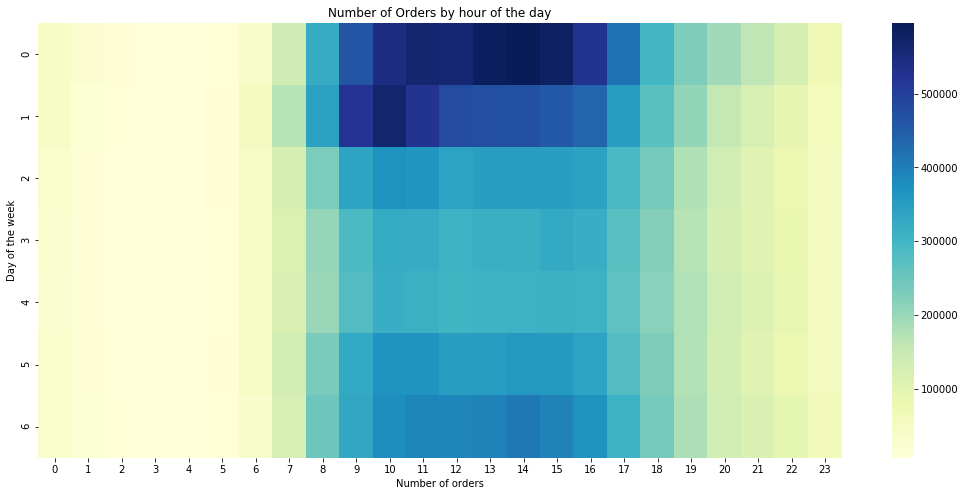

In [16]:
#data processing
viz = df_master.groupby(['order_dow','order_hour_of_day']).count().reset_index()
viz.head(5)

#pivoting the data for heatmap
hm_df = pd.pivot_table(viz, values='order_id', index=['order_dow'],columns='order_hour_of_day')
plt.figure(figsize=(18,8))
ax = sns.heatmap(hm_df, cmap='YlGnBu')
ax.set(xlabel='Number of orders', ylabel='Day of the week')
plt.title('Number of Orders by hour of the day')
plt.show()

### Most "Frequently" Bought Products

Text(0.5,0,'Product Name')

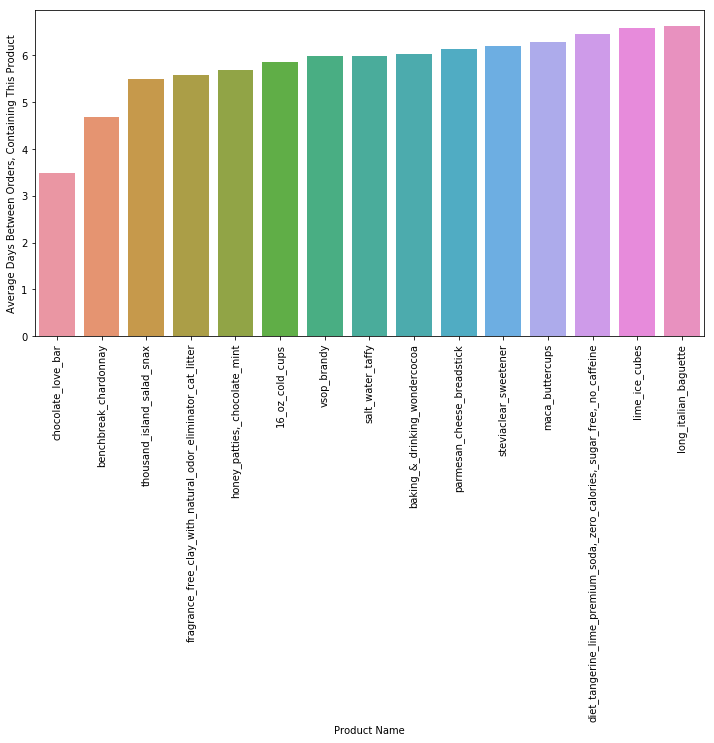

In [17]:
# most "frequently" bought products (total set, not only train)
# most "frequently" ~ time between orders (within selected customer's orders), 
# that contain that product, is the least 
#(products, which were bought by more than 100 customers, to omit outliers)
top = 15
customer_limit = 100

temp = df_master.groupby(['product_id'])[['days_since_prior_order', 'user_id']].agg({'days_since_prior_order': np.mean, 'user_id': len}).reset_index()

frequent_products = pd.merge(
                            left=pd.DataFrame(temp[temp['user_id'] > customer_limit].sort_values(['days_since_prior_order'], 
                                                                      ascending=True)[:top]),
                            right=goods,
                            how='left')

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(frequent_products.product_name, frequent_products.days_since_prior_order)
plt.ylabel('Average Days Between Orders, Containing This Product')
plt.xlabel('Product Name')

### Products with the Highest Reorder Rate

Text(0.5,0,'Product Name')

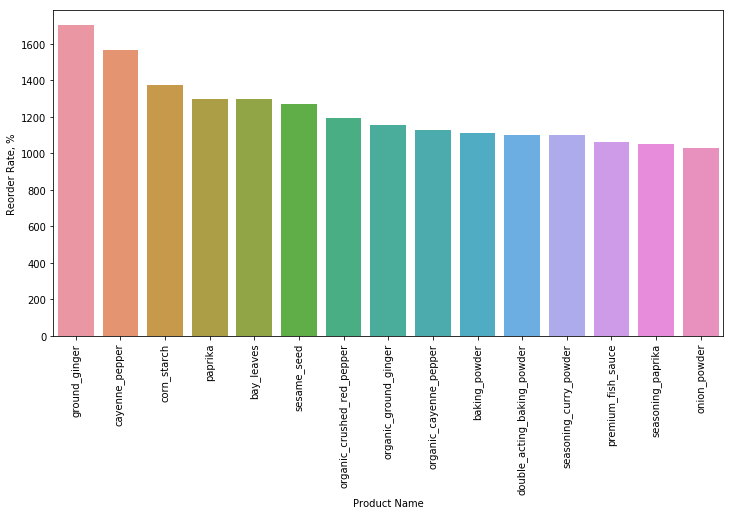

In [18]:
# consider products, purchased in more than X orders
order_limit = 100
top = 15

mo_products = df_master.groupby('product_id')[['reordered', 'order_id']].agg({'reordered': sum, 'order_id': len}).reset_index()
mo_products.columns = ['product_id', 'reordered', 'order_cnt']

mo_products['reorder_rate'] = mo_products['reordered'] / mo_products['order_cnt']
mo_products = mo_products[mo_products.order_cnt > order_limit].sort_values(['reorder_rate'],ascending=False)[:top]

mo_products = pd.merge(
                        left=mo_products,
                        right=goods,
                        on='product_id'
                        )
# plot
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
sns.barplot(mo_products.product_name, mo_products.reorder_rate*100)
plt.ylabel('Reorder Rate, %')
plt.xlabel('Product Name')

### Distribution of Order Count per User

Most common user made: 4 purchases


Text(0.5,0,'Number of Orders, made by a User')

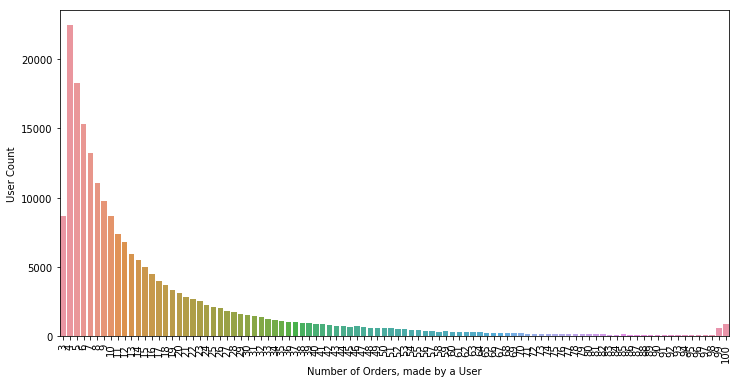

In [24]:
count_per_user = df_master.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index().groupby('order_id').agg('count')
print('Most common user made: {} purchases'.format(count_per_user[count_per_user['user_id'] == count_per_user['user_id'].max()].index.values[0]))

plt.figure(figsize=(12, 6))
sns.barplot(count_per_user.index, count_per_user['user_id'])
plt.xticks(rotation='vertical')
plt.ylabel('User Count')
plt.xlabel('Number of Orders, made by a User')

## Association Rule mining

In [26]:
# Sample data
orders = np.array([[1,'apple'], [1,'egg'], [1,'milk'], [2,'egg'], [2,'milk']], dtype=object)

# Generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    
    # For each order, generate a list of items in that order
    for order_id, order_object in groupby(orders, lambda x: x[0]):
        item_list = [item[1] for item in order_object]      
    
        # For each item list, generate item pairs, one at a time
        for item_pair in combinations(item_list, 2):
            yield item_pair                                      

# Counter iterates through the item pairs returned by our generator and keeps a tally of their occurrence
Counter(get_item_pairs(orders))

Counter({('apple', 'egg'): 1, ('apple', 'milk'): 1, ('egg', 'milk'): 2})

In [34]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
order_np = df_master.set_index('order_id')['product_id'].rename('item_id')
display(order_np.head(10))
type(order_np)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

### Association Rules Function

In [37]:
#Function Definitions

def freq(iterable):
    '''
    Function: Returns frequency counts for items and item pairs
    '''
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

def order_count(order_item):
    '''
    Function: Returns number of unique orders
    '''
    return len(set(order_item.index))


def get_item_pairs(order_item):
    '''
    Function:Returns generator that yields item pairs, one at a time
    '''
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            
def merge_item_stats(item_pairs, item_stats):
    '''
    Function:Returns frequency and support associated with item
    '''
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

def merge_item_name(rules, item_name):
    '''
    Function:Returns name associated with item
    ''' 
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns] 


def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))

    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
rules = association_rules(order_np, 0.01)  

Starting order_item:               33819106
Items with support >= 0.01:           10949
Remaining order_item:              31116451
Remaining orders with 2+ items:     3136021
Remaining order_item:              30928016


## Main Datasets (orders + order details)

In [7]:
# load datasets

# train dataset
op_train = pd.read_csv('../input/order_products__train.csv', engine='c', 
                       dtype={'order_id': np.int32, 'product_id': np.int32, 
                              'add_to_cart_order': np.int16, 'reordered': np.int8})
print('Total ordered products(train): {}'.format(op_train.shape[0]))
op_train.head(10)

Total ordered products(train): 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [8]:
# test dataset (submission)
test = pd.read_csv('../input/sample_submission.csv', engine='c')
print('Total orders(test): {}'.format(op_train.shape[0]))
test.head()

Total orders(test): 1384617


,order_id,products
0,17,39276
1,34,39276
2,137,39276
3,182,39276
4,257,39276


In [9]:
# prior dataset
op_prior = pd.read_csv('../input/order_products__prior.csv', engine='c', 
                       dtype={'order_id': np.int32, 'product_id': np.int32, 
                              'add_to_cart_order': np.int16, 'reordered': np.int8})
print('Total ordered products(prior): {}'.format(op_prior.shape[0]))
op_prior.head()

Total ordered products(prior): 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
# orders
orders = pd.read_csv('../input/orders.csv', engine='c', dtype={'order_id': np.int32, 
                                                           'user_id': np.int32, 
                                                           'order_number': np.int32, 
                                                           'order_dow': np.int8, 
                                                           'order_hour_of_day': np.int8, 
                                                           'days_since_prior_order': np.float16})
print('Total orders: {}'.format(orders.shape[0]))
orders.head()

Total orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
# unordered products
unordered = goods[goods.product_id.isin(list(set(goods.product_id) - set(order_details.product_id)))]
print('"Lonesome" products cnt: {}/{}'.format(unordered.shape[0], len(goods)))
unordered.head()

"Lonesome" products cnt: 3/49688


,product_id,product_name,aisle_id,department_id,department,aisle
3629,3630,protein_granola_apple_crisp,57,14,breakfast,granola
7044,7045,unpeeled_apricot_halves_in_heavy_syrup,88,13,pantry,spreads
46624,46625,single_barrel_kentucky_straight_bourbon_whiskey,31,7,beverages,refrigerated


### Orders, Split by Product Count

Most common order contains: 5 products
CPU times: user 1.89 s, sys: 4.63 s, total: 6.52 s
Wall time: 6.51 s


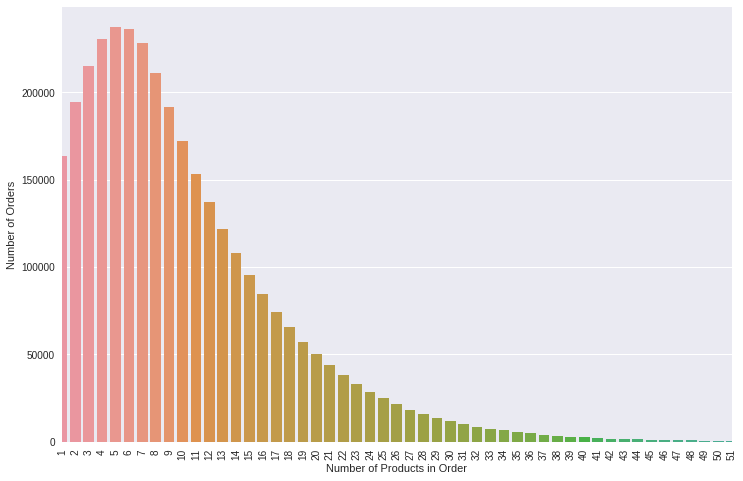

In [17]:
%%time
ord_by_prods = order_details.groupby("order_id")["add_to_cart_order"]\
.aggregate(np.max).reset_index()['add_to_cart_order'].value_counts()

print('Most common order contains: {} products'.format(
    ord_by_prods[ord_by_prods.values == ord_by_prods.max()].index.values[0]))

# plot it
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.barplot(ord_by_prods.index, ord_by_prods.values)
plt.ylabel('Number of Orders')
plt.xlabel('Number of Products in Order')
plt.xlim([0, 50])
pass

### Days to Next Order

Most frequently next orders are made once in: 30 days
We clearly see monthly (>=30) and weekly (7) peaks
CPU times: user 3.13 s, sys: 8.56 s, total: 11.7 s
Wall time: 11.7 s


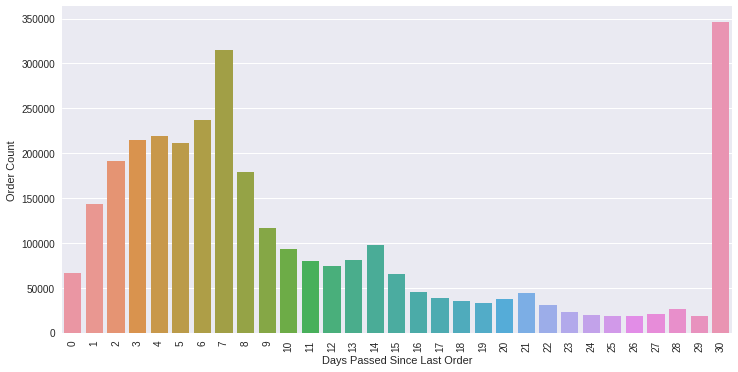

In [24]:
%%time
dtno = order_details.dropna(axis=0, 
                     subset=['days_since_prior_order']).groupby('order_id')['days_since_prior_order']\
.aggregate("mean").reset_index().apply(np.int32).groupby('days_since_prior_order').aggregate("count")

print('Most frequently next orders are made once in: {} days'.format(
    dtno[dtno.order_id == dtno.order_id.max()].index.values[0]))

print('We clearly see monthly (>=30) and weekly (7) peaks')

plt.figure(figsize=(12, 6))
sns.barplot(dtno.index, dtno.order_id)
plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Days Passed Since Last Order')
pass

### Time of last order vs. probability of reorder (also inspired by <a href="https://www.kaggle.com/philippsp/first-exploratory-analysis">This Kernel</a>)

We can see that longer lags leads to lowered probability (new items),
while same day orders tends to have more overlapped product list
CPU times: user 2.35 s, sys: 7.5 s, total: 9.85 s
Wall time: 9.85 s


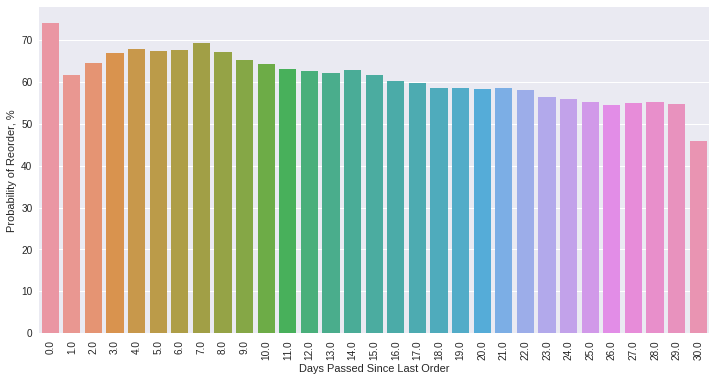

In [25]:
%%time

por = order_details.dropna(axis=0, subset=['days_since_prior_order'])\
.groupby('days_since_prior_order')['reordered'].aggregate("mean").reset_index()

print('We can see that longer lags leads to lowered probability (new items),\
\nwhile same day orders tends to have more overlapped product list')

plt.figure(figsize=(12, 6))
sns.barplot(por.days_since_prior_order, por.reordered*100)
plt.xticks(rotation='vertical')
plt.ylabel('Probability of Reorder, %')
plt.xlabel('Days Passed Since Last Order')
pass